# Download and explore the Data

In [3]:
import os
import torch
import torchvision
import tarfile
from torchvision.datasets.utils import download_url
from torch.utils.data import random_split

In [4]:
# Project name for jovian
project_name = 'cifar100 CN ResNet'

In [5]:
# Download the dataset
dataset_url = "https://s3.amazonaws.com/fast-ai-imageclas/cifar100.tgz"
download_url(dataset_url, '.')

Using downloaded and verified file: .\cifar100.tgz


In [6]:
#Exctract from archive
# with tarfile.open('./cifar100.tgz' , 'r:gz') as tar:
    # tar.extractall(path = './data')

In [7]:
#Folders and classes
data_dir = './data/cifar100'

print(os.listdir(data_dir))
classes = os.listdir(data_dir + "/train")
print(classes)

['test', 'train']
['apple', 'aquarium_fish', 'baby', 'bear', 'beaver', 'bed', 'bee', 'beetle', 'bicycle', 'bottle', 'bowl', 'boy', 'bridge', 'bus', 'butterfly', 'camel', 'can', 'castle', 'caterpillar', 'cattle', 'chair', 'chimpanzee', 'clock', 'cloud', 'cockroach', 'couch', 'crab', 'crocodile', 'cup', 'dinosaur', 'dolphin', 'elephant', 'flatfish', 'forest', 'fox', 'girl', 'hamster', 'house', 'kangaroo', 'keyboard', 'lamp', 'lawn_mower', 'leopard', 'lion', 'lizard', 'lobster', 'man', 'maple_tree', 'motorcycle', 'mountain', 'mouse', 'mushroom', 'oak_tree', 'orange', 'orchid', 'otter', 'palm_tree', 'pear', 'pickup_truck', 'pine_tree', 'plain', 'plate', 'poppy', 'porcupine', 'possum', 'rabbit', 'raccoon', 'ray', 'road', 'rocket', 'rose', 'sea', 'seal', 'shark', 'shrew', 'skunk', 'skyscraper', 'snail', 'snake', 'spider', 'squirrel', 'streetcar', 'sunflower', 'sweet_pepper', 'table', 'tank', 'telephone', 'television', 'tiger', 'tractor', 'train', 'trout', 'tulip', 'turtle', 'wardrobe', 'whal

In [8]:
#Taking a look inside some folders
apple_files = os.listdir(data_dir + "/train/apple")
print('No. of training samples of apples: ' , len(apple_files))
print(apple_files[:5])

sea_files = os.listdir(data_dir + "/train/sea")
print('No. of training samples of sea: ' , len(sea_files))
print(sea_files[:5])

No. of training samples of apples:  500
['apple_s_000027.png', 'apple_s_000028.png', 'apple_s_000049.png', 'apple_s_000050.png', 'apple_s_000057.png']
No. of training samples of sea:  500
['adriatic_sea_s_000005.png', 'adriatic_sea_s_000017.png', 'adriatic_sea_s_000018.png', 'adriatic_sea_s_000025.png', 'adriatic_sea_s_000027.png']


In [9]:
#Load the data to tensors
from torchvision.datasets import ImageFolder
from torchvision.transforms import ToTensor

In [10]:
import torchvision.transforms as tt
stats = ((0.5071, 0.4863, 0.4406), (0.2673, 0.2564, 0.2761))
train_tfms = tt.Compose([tt.RandomCrop(32, padding = 4, padding_mode = 'reflect'),
                         tt.RandomHorizontalFlip(),
                         # tt.RandomRotate
                         # tt.RandomResizedCrop(256, scale=(0.5,0.9), ratio=(1, 1)), 
                         # tt.ColorJitter(brightness=0.1, contrast=0.1, saturation=0.1, hue=0.1),
                         tt.ToTensor(),
                         tt.Normalize(*stats, inplace = True)])

valid_tfms = tt.Compose([tt.ToTensor(), tt.Normalize(*stats)])
train_tfms

Compose(
    RandomCrop(size=(32, 32), padding=4)
    RandomHorizontalFlip(p=0.5)
    ToTensor()
    Normalize(mean=(0.5071, 0.4863, 0.4406), std=(0.2673, 0.2564, 0.2761))
)

In [11]:
# from torch.utils.data import Dataset

# class MyDataset(Dataset):
#     def __init__(self, subset, transform=None):
#         self.subset = subset
#         self.transform = transform
        
#     def __getitem__(self, index):
#         if self.transform:
#             x = self.transform(subset[index][0])
#         else:
#             x = subset[index][0]
#         y = subset[index][1]
#         return x, y
        
#     def __len__(self):
#         return len(self.subset)

In [12]:
# dataset = ImageFolder(data_dir+'/train', transform=ToTensor())

# traindataset = MyDataset(dataset,train_tfms)
# valdataset = MyDataset(dataset,valid_tfms)

In [13]:
random_seed = 42
torch.manual_seed(random_seed);

dataset = ImageFolder(data_dir+'/train', transform=ToTensor())

val_size = 5000
train_size = len(dataset) - val_size

train_ds, val_ds = random_split(dataset, [train_size, val_size])
len(train_ds), len(val_ds)

(45000, 5000)

In [14]:
#Lets look at a sample
img, label = dataset[0]
print(img.shape, label)
img

torch.Size([3, 32, 32]) 0


tensor([[[0.9882, 1.0000, 0.9961,  ..., 1.0000, 1.0000, 0.9490],
         [0.9843, 0.9961, 0.9922,  ..., 0.9961, 1.0000, 0.9490],
         [0.9843, 0.9922, 0.9922,  ..., 0.9922, 0.9922, 0.9490],
         ...,
         [0.9882, 0.9961, 0.9961,  ..., 0.9961, 1.0000, 0.9490],
         [0.9882, 0.9961, 0.9961,  ..., 1.0000, 1.0000, 0.9490],
         [0.9882, 0.9961, 1.0000,  ..., 1.0000, 1.0000, 0.9490]],

        [[0.9882, 1.0000, 1.0000,  ..., 0.9961, 1.0000, 0.9490],
         [0.9882, 0.9961, 1.0000,  ..., 0.9961, 0.9961, 0.9490],
         [0.9882, 0.9922, 0.9922,  ..., 0.9804, 0.9961, 0.9490],
         ...,
         [0.9882, 0.9961, 1.0000,  ..., 1.0000, 1.0000, 0.9490],
         [0.9882, 0.9961, 1.0000,  ..., 0.9961, 1.0000, 0.9490],
         [0.9922, 1.0000, 1.0000,  ..., 1.0000, 1.0000, 0.9490]],

        [[0.9804, 0.9922, 0.9922,  ..., 0.9961, 1.0000, 0.9490],
         [0.9647, 0.9765, 0.9725,  ..., 1.0000, 1.0000, 0.9490],
         [0.9608, 0.9647, 0.9647,  ..., 0.9647, 0.9961, 0.

In [15]:
print(dataset.classes)

['apple', 'aquarium_fish', 'baby', 'bear', 'beaver', 'bed', 'bee', 'beetle', 'bicycle', 'bottle', 'bowl', 'boy', 'bridge', 'bus', 'butterfly', 'camel', 'can', 'castle', 'caterpillar', 'cattle', 'chair', 'chimpanzee', 'clock', 'cloud', 'cockroach', 'couch', 'crab', 'crocodile', 'cup', 'dinosaur', 'dolphin', 'elephant', 'flatfish', 'forest', 'fox', 'girl', 'hamster', 'house', 'kangaroo', 'keyboard', 'lamp', 'lawn_mower', 'leopard', 'lion', 'lizard', 'lobster', 'man', 'maple_tree', 'motorcycle', 'mountain', 'mouse', 'mushroom', 'oak_tree', 'orange', 'orchid', 'otter', 'palm_tree', 'pear', 'pickup_truck', 'pine_tree', 'plain', 'plate', 'poppy', 'porcupine', 'possum', 'rabbit', 'raccoon', 'ray', 'road', 'rocket', 'rose', 'sea', 'seal', 'shark', 'shrew', 'skunk', 'skyscraper', 'snail', 'snake', 'spider', 'squirrel', 'streetcar', 'sunflower', 'sweet_pepper', 'table', 'tank', 'telephone', 'television', 'tiger', 'tractor', 'train', 'trout', 'tulip', 'turtle', 'wardrobe', 'whale', 'willow_tree',

In [16]:
#Lets visualise some samples
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

matplotlib.rcParams['figure.facecolor'] = '#ffffff'

In [17]:
#Function to show an image
def show_image(img, label):
    print('Label: ',dataset.classes[label], "("+str(label)+")")
    plt.imshow(img.permute(1,2,0))

Label:  apple (0)


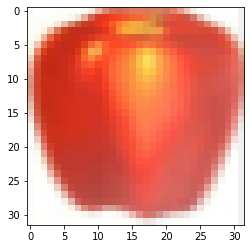

In [18]:
show_image(*dataset[0])

Label:  baby (2)


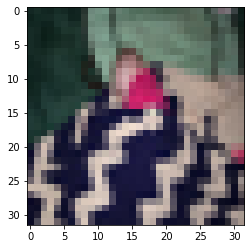

In [19]:
show_image(*dataset[1099])

In [20]:
#Save and upload to Jovian
!pip install jovian --upgrade -q

In [21]:
import jovian

In [19]:
jovian.commit(project=project_name)

<IPython.core.display.Javascript object>

[jovian] Creating a new project "luisdio1/cifar100 CN ResNet"
[jovian] Committed successfully! https://jovian.ai/luisdio1/cifar100-cn-resnet


'https://jovian.ai/luisdio1/cifar100-cn-resnet'

# Using a GPU

In [36]:
def get_default_device():
    """Pick GPU if available, else CPU"""
    if torch.cuda.is_available():
        return torch.device('cuda')
    else:
        return torch.device('cpu')
    
def to_device(data, device):
    """Move tensor(s) to chosen device"""
    if isinstance(data, (list,tuple)):
        return [to_device(x, device) for x in data]
    return data.to(device, non_blocking=True)

class DeviceDataLoader():
    """Wrap a dataloader to move data to a device"""
    def __init__(self, dl, device):
        self.dl = dl
        self.device = device
        
    def __iter__(self):
        """Yield a batch of data after moving it to device"""
        for b in self.dl: 
            yield to_device(b, self.device)

    def __len__(self):
        """Number of batches"""
        return len(self.dl)

In [37]:
device = get_default_device()
device

device(type='cuda')

# Train and Validate

In [22]:
#Create the training and validation dataset
# import numpy as np

# train_size = 0.8
# num_train = len(dataset)
# indices = list(range(num_train))
# split = int(np.floor(train_size * num_train))
# split2 = int(np.floor((train_size+(1-train_size)/2) * num_train))
# np.random.shuffle(indices)
# train_idx, valid_idx, test_idx = indices[:split], indices[split:split2], indices[split2:]

In [26]:
from copy import copy

train_ds, val_ds = random_split(dataset, [train_size, val_size])
train_ds.dataset = copy(dataset)

val_ds.dataset.transform = valid_tfms

train_ds.dataset.transform = train_tfms

val_size = len(val_ds) 
train_size = len(train_ds)

In [27]:
# from torch.utils.data import Subset

# traindata = Subset(traindataset, indices=train_idx)
# valdata = Subset(valdataset, indices=valid_idx)
# val_size = len(valdata)
# train_size = len(traindata)

In [28]:
#Log into jovian the parameters so far
jovian.log_dataset(dataset_url=dataset_url, val_size=val_size, random_seed=random_seed)

[jovian] Dataset logged.


In [29]:
#Next we create the data loaders
from torch.utils.data.dataloader import DataLoader

batch_size = 128

In [30]:
# train_dl = DataLoader(train_ds, batch_size, shuffle = True, num_workers = 4, pin_memory = True)
# val_dl = DataLoader(val_ds, batch_size*2, num_workers = 4, pin_memory = True)
train_dl =DataLoader(train_ds, batch_size=batch_size, 
                                          num_workers=4, pin_memory = True)
val_dl =DataLoader(val_ds, batch_size=batch_size, 
                                          num_workers=4, pin_memory = True)

In [39]:
train_dl = DeviceDataLoader(train_dl, device)
valid_dl = DeviceDataLoader(val_dl, device)

In [31]:
def batch_mean_and_sd(loader):
    
    cnt = 0
    fst_moment = torch.empty(3)
    snd_moment = torch.empty(3)

    print("Starting calculation")
    for images, _ in loader:
        b, c, h, w = images.shape
        nb_pixels = b * h * w
        sum_ = torch.sum(images, dim=[0, 2, 3])
        sum_of_square = torch.sum(images ** 2,
                                  dim=[0, 2, 3])
        fst_moment = (cnt * fst_moment + sum_) / (cnt + nb_pixels)
        snd_moment = (cnt * snd_moment + sum_of_square) / (cnt + nb_pixels)
        cnt += nb_pixels

    mean, std = fst_moment, torch.sqrt(snd_moment - fst_moment ** 2)        
    return mean,std

In [32]:
# mean, std = batch_mean_and_sd(train_dl)
# print("mean and std: \n", mean, std)

In [33]:
#Lets look at a random batch
from torchvision.utils import make_grid

def denormalize(images, means, stds):
    means = torch.tensor(means).reshape(1, 3, 1, 1)
    stds = torch.tensor(stds).reshape(1, 3, 1, 1)
    return images * stds + means

def show_batch(dl):
    for images, labels in dl:
        fig, ax = plt.subplots(figsize=(12, 12))
        ax.set_xticks([]); ax.set_yticks([])
        denorm_images = denormalize(images, *stats)
        ax.imshow(make_grid(denorm_images[:64], nrow=8).permute(1, 2, 0).clamp(0,1))
        break

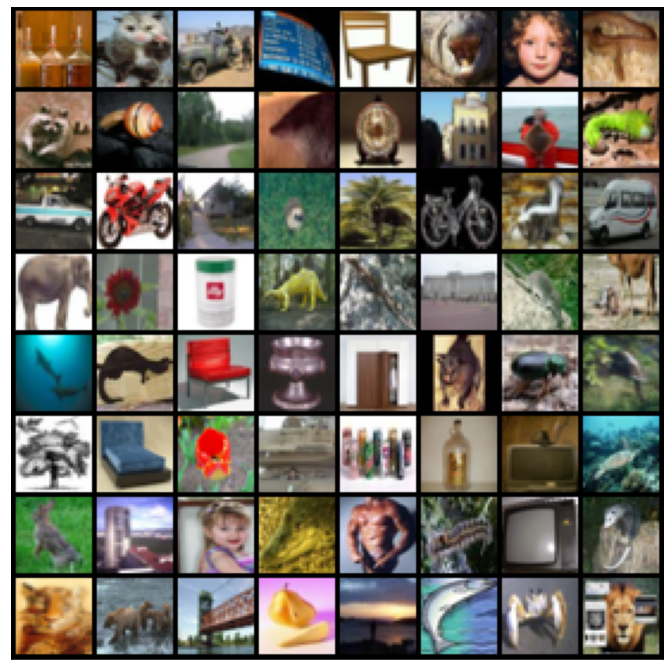

In [34]:
show_batch(train_dl)

In [35]:
#Lets commit to jovian
jovian.commit(project=project_name, environment=None)

<IPython.core.display.Javascript object>

[jovian] Updating notebook "luisdio1/cifar100-cn-resnet" on https://jovian.ai/
[jovian] Attaching records (metrics, hyperparameters, dataset etc.)
[jovian] Committed successfully! https://jovian.ai/luisdio1/cifar100-cn-resnet


'https://jovian.ai/luisdio1/cifar100-cn-resnet'

# Defining The Model

In [40]:
import torch.nn as nn
import torch.nn.functional as F

In [41]:
#Defining the general model for image classification
class ImageClassificationBase(nn.Module):
    def training_step(self, batch):
        images, labels = batch
        out = self(images)                   #Generate predictions
        loss = F.cross_entropy(out, labels)  #Calculate loss
        return loss
    
    def validation_step(self, batch):
        print("validation step")
        images, labels = batch
        out = self(images)                   #Generate predictions
        loss = F.cross_entropy(out, labels)  #Calculate loss
        acc = accuracy(out, labels)          #Calculate accuracy
        return {'val_loss' : loss.detach() , 'val_acc' : acc}
    
    def validation_epoch_end(self, outputs):
        batch_losses = [x['val_loss'] for x in outputs]
        epoch_loss = torch.stack(batch_losses).mean()   # Combine losses
        batch_accs = [x['val_acc'] for x in outputs]
        epoch_acc = torch.stack(batch_accs).mean()      # Combine accuracies
        return {'val_loss': epoch_loss.item(), 'val_acc': epoch_acc.item()}
    
    def epoch_end(self, epoch, result):
        print("Epoch [{}], last_lr: {:.5f}, train_loss: {:.4f}, val_loss: {:.4f}, val_acc: {:.4f}".format(
            epoch, result['lrs'][-1], result['train_loss'], result['val_loss'], result['val_acc']))
        
def accuracy(outputs, labels):
    _, preds = torch.max(outputs, dim=1)
    return torch.tensor(torch.sum(preds == labels).item() / len(preds))

In [42]:
#Define the specific model
def conv_block(in_channels, out_channels, pool=False):
    layers = [nn.Conv2d(in_channels, out_channels, kernel_size=3, padding=1), 
              nn.BatchNorm2d(out_channels), 
              nn.ReLU(inplace=True)]
    if pool: layers.append(nn.MaxPool2d(2))
    return nn.Sequential(*layers)

# class Cifar100CnnModel(ImageClassificationBase):
#     def __init__(self):
#         super().__init__()
#         self.network = nn.Sequential(
#             nn.Conv2d(3, 32 , kernel_size = 3, padding = 1),
#             nn.ReLU(),
            
#             nn.Conv2d(32, 64, kernel_size=3, stride=1, padding=1),
#             nn.ReLU(),
#             nn.MaxPool2d(2, 2), # output: 64 x 16 x 16
        
#             nn.Conv2d(64, 128, kernel_size=3, stride=1, padding=1),
#             nn.ReLU(),
        
#             nn.Conv2d(128, 128, kernel_size=3, stride=1, padding=1),
#             nn.ReLU(),
#             nn.MaxPool2d(2, 2), # output: 128 x 8 x 8
        
#             nn.Conv2d(128, 256, kernel_size=3, stride=1, padding=1),
#             nn.ReLU(),
        
#             nn.Conv2d(256, 256, kernel_size=3, stride=1, padding=1),
#             nn.ReLU(),
#             nn.MaxPool2d(2, 2), # output: 256 x 4 x 4
        
#             nn.Flatten(), 
#             nn.Linear(256*4*4, 1024),
#             nn.ReLU(),
        
#             nn.Linear(1024, 512),
#             nn.ReLU(),
#             nn.Linear(512, 100))
        
#     def forward(self, xb):
#         return self.network(xb)

class ResNet9(ImageClassificationBase):
    def __init__(self, in_channels, num_classes):
        super().__init__()
        
        self.conv1 = conv_block(in_channels, 64)
        self.conv2 = conv_block(64, 128, pool=True)
        self.res1 = nn.Sequential(conv_block(128, 128), conv_block(128, 128))
        
        self.conv3 = conv_block(128, 256, pool=True)
        self.conv4 = conv_block(256, 512, pool=True)
        self.res2 = nn.Sequential(conv_block(512, 512), conv_block(512, 512))
        
        self.classifier = nn.Sequential(nn.MaxPool2d(4), 
                                        nn.Flatten(), 
                                        nn.Dropout(0.2),
                                        nn.Linear(512, num_classes))
        
    def forward(self, xb):
        out = self.conv1(xb)
        out = self.conv2(out)
        out = self.res1(out) + out
        out = self.conv3(out)
        out = self.conv4(out)
        out = self.res2(out) + out
        out = self.classifier(out)
        return out

In [43]:
# model = Cifar100CnnModel()
model = to_device(ResNet9(3, 100), device)
model

ResNet9(
  (conv1): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
  )
  (conv2): Sequential(
    (0): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (res1): Sequential(
    (0): Sequential(
      (0): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (1): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU(inplace=True)
    )
    (1): Sequential(
      (0): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (1): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU(inplace=Tr

In [34]:
device = get_default_device()
device

device(type='cuda')

In [44]:
#Wrap the data loader with our custom class and move the model to the device
# train_dl = DeviceDataLoader(train_dl, device)
# val_dl = DeviceDataLoader(val_dl, device)
# to_device(model, device);

In [45]:
#Lets commit again
jovian.commit(project=project_name)

<IPython.core.display.Javascript object>

[jovian] Updating notebook "luisdio1/cifar100-cn-resnet" on https://jovian.ai/
[jovian] Attaching records (metrics, hyperparameters, dataset etc.)
[jovian] Committed successfully! https://jovian.ai/luisdio1/cifar100-cn-resnet


'https://jovian.ai/luisdio1/cifar100-cn-resnet'

# Train The Model

In [46]:
#Fit and evaluate methods
@torch.no_grad()

def evaluate(model, val_loader):
    model.eval()
    # print("evaluate")
    outputs = [model.validation_step(batch) for batch in val_loader]
    return model.validation_epoch_end(outputs)

def get_lr(optimizer):
    for param_group in optimizer.param_groups:
        return param_group['lr']
    
# def fit(epochs, lr, model, train_loader, val_loader, opt_func = torch.optim.SGD):
#     history = []
#     optimizer = opt_func(model.parameters(), lr)
#     for epoch in range(epochs):
#         # Training Phase 
#         model.train()
#         train_losses = []
#         for batch in train_loader:
#             loss = model.training_step(batch)
#             train_losses.append(loss)
#             loss.backward()
#             optimizer.step()
#             optimizer.zero_grad()
#         # Validation phase
#         result = evaluate(model, val_loader)
#         result['train_loss'] = torch.stack(train_losses).mean().item()
#         model.epoch_end(epoch, result)
#         history.append(result)
#     return history

def fit_one_cycle(epochs, max_lr, model, train_loader, val_loader, 
                  weight_decay=0, grad_clip=None, opt_func=torch.optim.SGD):
    torch.cuda.empty_cache()
    history = []
    
    # Set up cutom optimizer with weight decay
    optimizer = opt_func(model.parameters(), max_lr, weight_decay=weight_decay)
    # Set up one-cycle learning rate scheduler
    sched = torch.optim.lr_scheduler.OneCycleLR(optimizer, max_lr, epochs=epochs, 
                                                steps_per_epoch=len(train_loader))
    
    for epoch in range(epochs):
        # Training Phase 
        model.train()
        train_losses = []
        lrs = []
        for batch in train_loader:
            loss = model.training_step(batch)
            train_losses.append(loss)
            loss.backward()
            
            # Gradient clipping
            if grad_clip: 
                nn.utils.clip_grad_value_(model.parameters(), grad_clip)
            
            optimizer.step()
            optimizer.zero_grad()
            
            # Record & update learning rate
            lrs.append(get_lr(optimizer))
            sched.step()
        
        # Validation phase
        result = evaluate(model, val_loader)
        result['train_loss'] = torch.stack(train_losses).mean().item()
        result['lrs'] = lrs
        model.epoch_end(epoch, result)
        history.append(result)
    return history

In [37]:
#Instantiate the model and evaluate with random weights
# model = to_device(Cifar100CnnModel(), device)

In [47]:
history = [evaluate(model, valid_dl)]
history

validation step
validation step
validation step
validation step
validation step
validation step
validation step
validation step
validation step
validation step
validation step
validation step
validation step
validation step
validation step
validation step
validation step
validation step
validation step
validation step
validation step
validation step
validation step
validation step
validation step
validation step
validation step
validation step
validation step
validation step
validation step
validation step
validation step
validation step
validation step
validation step
validation step
validation step
validation step
validation step


[{'val_loss': 4.606774806976318, 'val_acc': 0.010546875186264515}]

In [48]:
#Lets start with some parameters and save them at jovian
# num_epochs = 10
# opt_func = torch.optim.Adam
# lr = 0.001

epochs = 8
max_lr = 0.01
grad_clip = 0.1
weight_decay = 1e-4
opt_func = torch.optim.Adam

In [34]:
# jovian.reset()
# jovian.log_hyperparams({
#     'num_epochs': num_epochs,
#     'opt_func': opt_func.__name__,
#     'batch_size': batch_size,
#     'lr': lr,
# })

[jovian] Hyperparams logged.


In [51]:
%%time
#Fit the model
# history = fit(num_epochs, lr, model, train_dl, val_dl, opt_func)

history += fit_one_cycle(epochs, max_lr, model, train_dl, valid_dl, 
                             grad_clip=grad_clip, 
                             weight_decay=weight_decay, 
                             opt_func=opt_func)

validation step
validation step
validation step
validation step
validation step
validation step
validation step
validation step
validation step
validation step
validation step
validation step
validation step
validation step
validation step
validation step
validation step
validation step
validation step
validation step
validation step
validation step
validation step
validation step
validation step
validation step
validation step
validation step
validation step
validation step
validation step
validation step
validation step
validation step
validation step
validation step
validation step
validation step
validation step
validation step
Epoch [0], last_lr: 0.00395, train_loss: 3.8773, val_loss: 3.9391, val_acc: 0.1467
validation step
validation step
validation step
validation step
validation step
validation step
validation step
validation step
validation step
validation step
validation step
validation step
validation step
validation step
validation step
validation step
validation step
valid

In [52]:
train_time='25:51'

In [53]:
# #Log the metrics to jovian
# jovian.log_metrics(train_loss=history[-1]['train_loss'], 
#                    val_loss=history[-1]['val_loss'], 
#                    val_acc=history[-1]['val_acc'])

# After Training

In [54]:
#Fuction to plot accuracy
def plot_accuracies(history):
    accuracies = [x['val_acc'] for x in history]
    plt.plot(accuracies, '-x')
    plt.xlabel('epoch')
    plt.ylabel('accuracy')
    plt.title('Accuracy vs. No. of epochs');

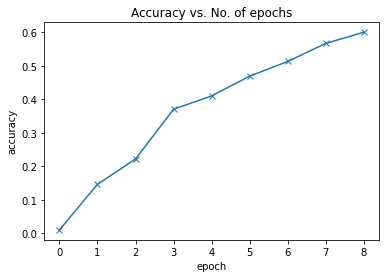

In [55]:
plot_accuracies(history)

In [56]:
#Function to plot losses
def plot_losses(history):
    train_losses = [x.get('train_loss') for x in history]
    val_losses = [x['val_loss'] for x in history]
    plt.plot(train_losses, '-bx')
    plt.plot(val_losses, '-rx')
    plt.xlabel('epoch')
    plt.ylabel('loss')
    plt.legend(['Training', 'Validation'])
    plt.title('Loss vs. No. of epochs');

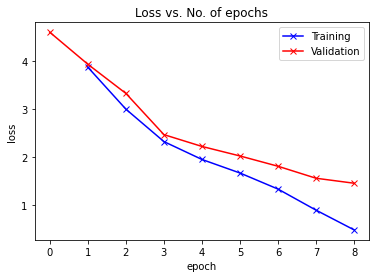

In [57]:
plot_losses(history)

In [60]:
import numpy as np

def plot_lrs(history):
    lrs = np.concatenate([x.get('lrs', []) for x in history])
    plt.plot(lrs)
    plt.xlabel('Batch no.')
    plt.ylabel('Learning rate')
    plt.title('Learning Rate vs. Batch no.');

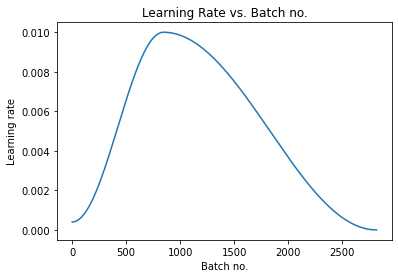

In [61]:
plot_lrs(history)

In [42]:
#Commit again
jovian.commit(project=project_name)

<IPython.core.display.Javascript object>

[jovian] Updating notebook "luisdio1/cifar100-cn" on https://jovian.ai/
[jovian] Attaching records (metrics, hyperparameters, dataset etc.)
[jovian] Committed successfully! https://jovian.ai/luisdio1/cifar100-cn


'https://jovian.ai/luisdio1/cifar100-cn'

# Test with individual images

In [62]:
test_dataset = ImageFolder(data_dir+'/test', transform=ToTensor())
test_tfms = tt.Compose([tt.ToTensor(), tt.Normalize(*stats)])

In [64]:
test_dataset.transform = test_tfms

In [65]:
#Function to test an image
def predict_image(img, model):
    # Convert to a batch of 1
    xb = to_device(img.unsqueeze(0), device)
    # Get predictions from model
    yb = model(xb)
    # Pick index with highest probability
    _, preds  = torch.max(yb, dim=1)
    # Retrieve the class label
    return dataset.classes[preds[0].item()]

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Label: apple , Predicted: apple


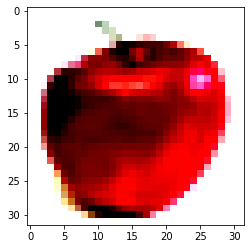

In [66]:
img, label = test_dataset[0]
plt.imshow(img.permute(1, 2, 0))
print('Label:', dataset.classes[label], ', Predicted:', predict_image(img, model))

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Label: bowl , Predicted: cattle


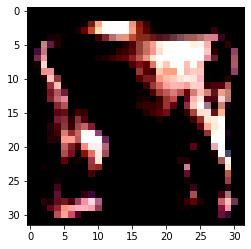

In [67]:
img, label = test_dataset[1002]
plt.imshow(img.permute(1, 2, 0))
print('Label:', dataset.classes[label], ', Predicted:', predict_image(img, model))

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Label: plate , Predicted: plate


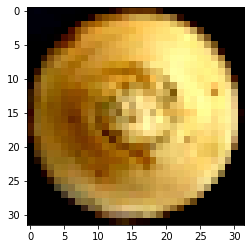

In [68]:
img, label = test_dataset[6153]
plt.imshow(img.permute(1, 2, 0))
print('Label:', dataset.classes[label], ', Predicted:', predict_image(img, model))

In [69]:
#Use the test dataset
test_loader = DeviceDataLoader(DataLoader(test_dataset, batch_size*2), device)
result = evaluate(model, test_loader)
result

validation step
validation step
validation step
validation step
validation step
validation step
validation step
validation step
validation step
validation step
validation step
validation step
validation step
validation step
validation step
validation step
validation step
validation step
validation step
validation step
validation step
validation step
validation step
validation step
validation step
validation step
validation step
validation step
validation step
validation step
validation step
validation step
validation step
validation step
validation step
validation step
validation step
validation step
validation step
validation step


{'val_loss': 1.2432329654693604, 'val_acc': 0.644335925579071}

In [70]:
torch.save(model.state_dict(), 'cifar10-resnet9.pth')

In [71]:
jovian.reset()
jovian.log_hyperparams(arch='resnet9', 
                       epochs=epochs, 
                       lr=max_lr, 
                       scheduler='one-cycle', 
                       weight_decay=weight_decay, 
                       grad_clip=grad_clip,
                       opt=opt_func.__name__)

[jovian] Hyperparams logged.


In [72]:
#Log the metrics
# jovian.log_metrics(test_loss=result['val_loss'], test_acc=result['val_acc'])

jovian.log_metrics(val_loss=history[-1]['val_loss'], 
                   val_acc=history[-1]['val_acc'],
                   train_loss=history[-1]['train_loss'],
                   time=train_time)

[jovian] Metrics logged.


In [52]:
#Save the model
# torch.save(model.state_dict(), 'cifar100-cnn.pth')

In [73]:
#Last commit
# jovian.commit(project=project_name)

jovian.commit(project=project_name, environment=None, outputs=['cifar10-resnet9.pth'])

<IPython.core.display.Javascript object>

[jovian] Updating notebook "luisdio1/cifar100-cn-resnet" on https://jovian.ai/
[jovian] Uploading additional outputs...
[jovian] Attaching records (metrics, hyperparameters, dataset etc.)
[jovian] Committed successfully! https://jovian.ai/luisdio1/cifar100-cn-resnet


'https://jovian.ai/luisdio1/cifar100-cn-resnet'